# LetsGrowMore Data science Internship program(May 2023)

## Task-1 : Iris Flowers Classification ML Project 

### Author : Kaushik kishor kajale

## Importing librires

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##  Loading the Dataset

In [2]:
data=pd.read_csv('iris.csv')
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

In [3]:
#delete the unused column
data=data.drop(columns='Id')
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory data analysis

In [4]:
data.shape

(150, 5)

There are 150 rows and 5 colunms in dataset

### basic Statistics

In [5]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Exploratory data analysis

In [7]:
#display no. of samples of each class
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
#check for null values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

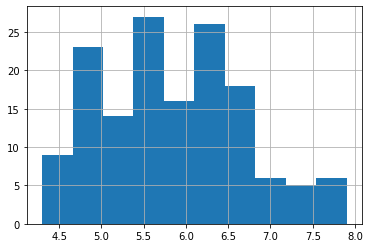

In [9]:
data['SepalLengthCm'].hist()

<AxesSubplot:>

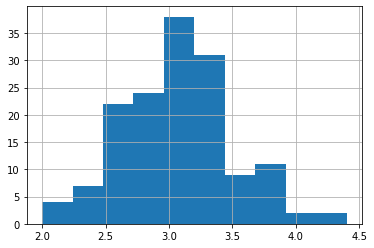

In [10]:
data['SepalWidthCm'].hist()

<AxesSubplot:>

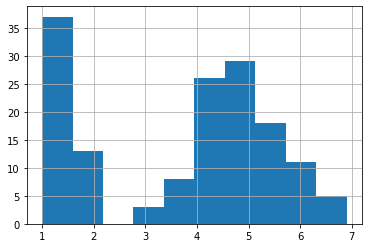

In [11]:
data['PetalLengthCm'].hist()

<AxesSubplot:>

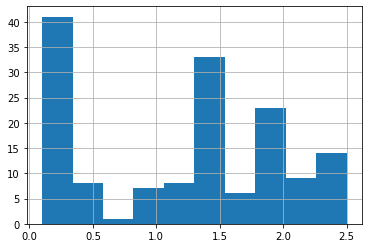

In [12]:
data['PetalWidthCm'].hist()

In [13]:
#scatterplot
colors = ['red','orange','blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

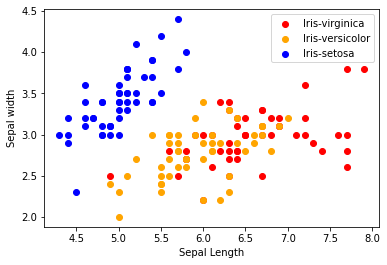

In [14]:
for i in range(3):
    x=data[data['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal width")
plt.legend()    

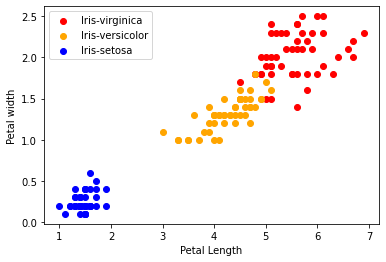

In [15]:
for i in range(3):
    x=data[data['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal width")
plt.legend()

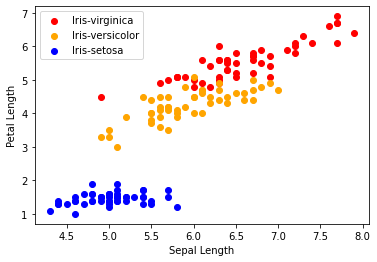

In [16]:
for i in range(3):
    x=data[data['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

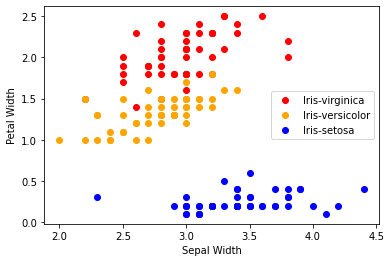

In [17]:
for i in range(3):
    x=data[data['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

## Correlation Matrix
- A correlation matrix is table showing correlation coefficient between  variables.Each cell in the table shows the correlation between two variables. The value in the range of -1 to 1. If two variables have high correlation, we can neglect one variable from those two.

In [18]:
corr=data.corr()

<AxesSubplot:>

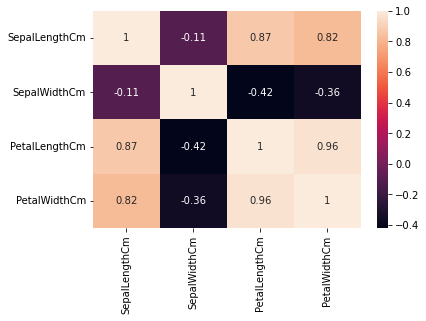

In [19]:
sns.heatmap(corr,annot=True)

## Label Encoding
- For converting Species coloumn string into numeric

In [20]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [21]:
data['Species']=le.fit_transform(data['Species'])
data.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Model Training

In [22]:
from sklearn.model_selection import train_test_split
X=data.drop(columns=['Species'])
y=data['Species']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30)


### Fitting Logistic regression

In [23]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [24]:
lr.fit(X_train,y_train)

LogisticRegression()

In [25]:
y_pred=lr.predict(X_test)
y_pred

array([1, 0, 0, 0, 2, 1, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1,
       2, 0, 2, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 0, 1, 1, 2, 2, 2, 0, 2,
       0])

### Cheking the accuracy of the model

In [26]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)*100

89.9702823179792

Accuracy is 93.67%

## Make prediction

In [27]:
expected = y
predicted = lr.predict(X)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Classification report

In [28]:
from sklearn import metrics

In [29]:
print(metrics.classification_report(expected,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [30]:
cnf=metrics.confusion_matrix(expected,predicted)
cnf

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]], dtype=int64)

<AxesSubplot:>

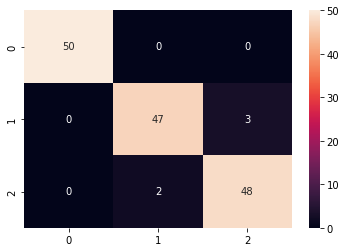

In [31]:
sns.heatmap(cnf,annot=True)

## Thank you